In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import warnings
import matplotlib.pyplot as plt
from scipy.stats import linregress
from pprint import pprint
import numpy as np
import json
import requests

In [64]:
netflix_imdb_ratings = pd.read_csv('/content/drive/MyDrive/netflix_imdb_ratings.csv')

In [65]:
netflix_imdb_ratings = netflix_imdb_ratings.drop(['Unnamed: 0'],axis=1)

# Is there a correlation between movie duration and movie ratings?

In [66]:
#create new df to show only movies
movie_ratings_df = netflix_imdb_ratings.loc[netflix_imdb_ratings['type'] == 'Movie']

In [67]:
#replacing the extra characters after the duration number
movie_ratings_df['duration'] = movie_ratings_df['duration'].str.replace(r'\D', '').astype(float)
movie_ratings_df['duration']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        98.0
2        98.0
3        93.0
5       121.0
8       114.0
        ...  
7417    101.0
7418     90.0
7419     95.0
7420    100.0
7421    128.0
Name: duration, Length: 5176, dtype: float64

The r-squared value is: 0.0012137954087007871


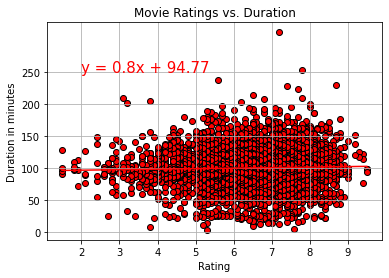

In [68]:
#scatter plot of ratings vs. movie duration
x_values = movie_ratings_df['overall imdb rating']
y_values = movie_ratings_df['duration']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",facecolors="red")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,250),fontsize=15,color="red")
plt.title("Movie Ratings vs. Duration")
plt.xlabel('Rating')
plt.ylabel('Duration in minutes')
plt.yticks(np.arange(0,300,50))
print(f"The r-squared value is: {rvalue**2}")
plt.grid()

plt.show()

In [69]:
#grouping ratings into net promoter categories
movie_ratings_df['Net Promoter'] = np.where(
    (movie_ratings_df['overall imdb rating'] >= 0) & (movie_ratings_df['overall imdb rating'] < 6.0), 'Detractors', np.where(
    (movie_ratings_df['overall imdb rating'] >= 6.0) & (movie_ratings_df['overall imdb rating'] < 8.0), 'Passives', 'Promoters'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [70]:
#Creating list for all detactors, passives, and promoters
detractors = movie_ratings_df[movie_ratings_df["Net Promoter"] == "Detractors"]['duration']
passives = movie_ratings_df[movie_ratings_df["Net Promoter"] == "Passives"]['duration']
promoters = movie_ratings_df[movie_ratings_df["Net Promoter"] == "Promoters"]['duration']

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


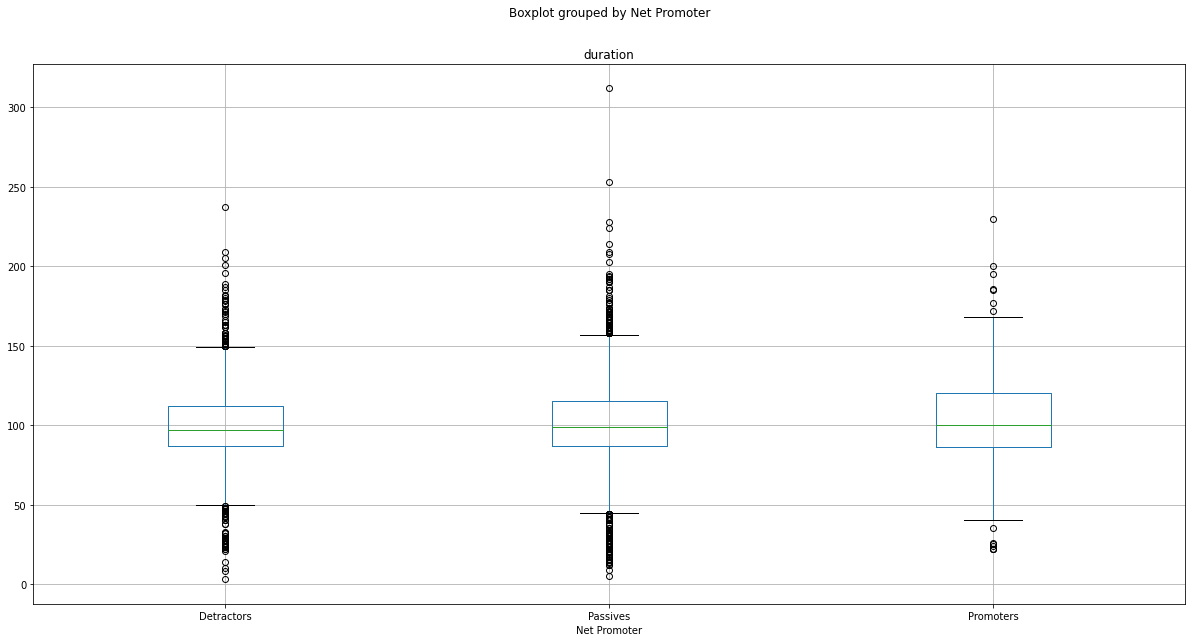

In [71]:
#boxplot of number of detractors,passives, and promoters 
movie_ratings_df.boxplot('duration', by='Net Promoter', figsize=(20, 10))

In [72]:
#ANOVA test to determine if there is any statistical significance between movie duration and rating
stats.f_oneway(detractors, passives, promoters)

F_onewayResult(statistic=2.1916488400658665, pvalue=0.11183610510245982)

# What were the top 10 movies on Netflix in 2020 based on average overall IMDB ratings? How did males rate these movies on average compared to famales?

In [73]:
#Getting 2020 Netlix movies
movie_ratings_2020 = movie_ratings_df.loc[movie_ratings_df['release_year'] == 2020]
movie_ratings_2020.head(2)

,title,imdb_title_id,overall imdb rating,total overall votes,male imdb rating,male votes,female imdb rating,female votes,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Net Promoter
20,David Attenborough: A Life on Our Planet,11989890,9.0,26940,8.9,14802.0,9.2,3353.0,s1634,Movie,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",David Attenborough,"United States, United Kingdom","October 4, 2020",2020,PG,84.0,Documentaries,"A broadcaster recounts his life, and the evolu...",Promoters
99,Guilty,419749,8.7,40603,8.4,8982.0,8.8,14243.0,s2550,Movie,Ruchi Narain,"Kiara Advani, Akansha Ranjan Kapoor, Gurfateh ...",India,"March 6, 2020",2020,TV-MA,120.0,"Dramas, International Movies",When a college heartthrob is accused of rape b...,Promoters


In [74]:
#Creating lists for top 10 movies and male and female ratings.
title_list = top_10_movies['title'].tolist()
overall_rating = top_10_movies['overall imdb rating'].tolist()
male_rating = top_10_movies['male imdb rating'].tolist()
female_rating = top_10_movies['female imdb rating'].tolist()

In [75]:
#Converting these values to float
overall_rating = [float(i) for i in overall_rating]
male_rating = [float(i) for i in male_rating]
female_rating = [float(i) for i in female_rating]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  app.launch_new_instance()


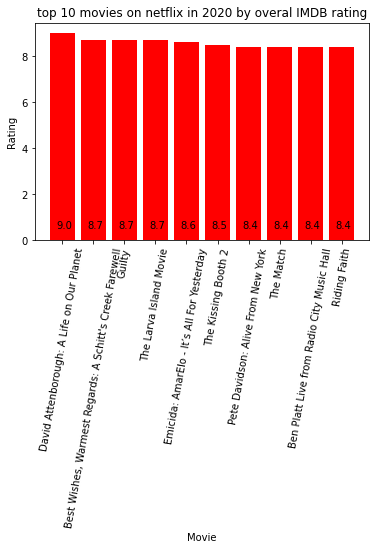

<Figure size 432x288 with 0 Axes>

In [76]:
#Creating a bar graph to show tv shows vs movies available

x_axis = np.arange(len(title_list))

#Create bar graph, and add labels.
plt.bar(x_axis, overall_rating, color='red', align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, title_list,rotation=80,ha='center')
for index,data in enumerate(overall_rating):
    plt.text(x=index-.2 , y =0.5 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.title("top 10 movies on netflix in 2020 by overal IMDB rating")
plt.xlabel("Movie")
plt.ylabel("Rating")


plt.tight_layout()

plt.show()
plt.savefig("/content/drive/MyDrive/Images/top_10_movies_2020.png")

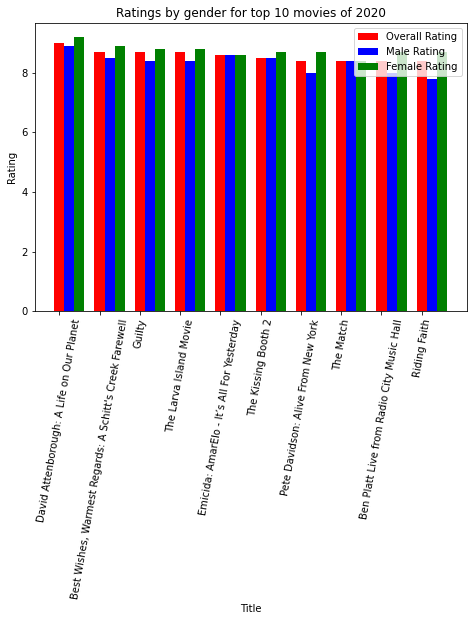

<Figure size 432x288 with 0 Axes>

In [77]:
x_axis = np.arange(len(title_list))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_axis + 0.00, overall_rating, color = 'red', width = 0.25)
ax.bar(x_axis + 0.25, male_rating, color = 'blue', width = 0.25)
ax.bar(x_axis + 0.50, female_rating, color = 'green', width = 0.25)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, title_list, rotation=80,ha='center')
plt.title("Ratings by gender for top 10 movies of 2020")
plt.xlabel("Title")
plt.ylabel("Rating")
ax.legend(labels=['Overall Rating', 'Male Rating','Female Rating'])

plt.show()
plt.savefig("/content/drive/MyDrive/Images/top_10_movies_2020_gender_ratings.png")